# Part I: Research Question

## A1: Question 

Based on available features within the dataset, what customers are more likely to remain loyal customers within the organization by predicting the churn variable?

## A2:  Data Analysis Goal

The goal of the data analysis is to categorize each observation (customer) into one category of the "Churn" variable by using the other variables in the observation. By conducting this categorization process, the organization then can create a model that can predict what customers will churn. If a good model is created, variables can be evaluated and used to target potential customers who have qualities that make them less likely to churn or adjust the organization's policies and procedures to meet those customers' expectations.

# Part II: Method Justification

## B1: Classification Method
The method that will be used to conduct classification is the K-nearest neighbor (KNN) classification method. KNN is a simple supervised algorithm that can be used to solve both regression and classification problems. KNN analyzes the dataset by plotting the variables or principal component analysis(PCA) of combined variables while leaving out the variable used to conduct classification. ("Contract") A split portion of the dataset or "training set" is used to plot variables/PCA's. Each data point is labeled with the original classification of each observation. Using this initially labeled plot, a model is created that will be used to run the unused portion of the dataset, or "testing set" through the model. When the testing set data is used, data points are plotted the same way as the training set, however, the points are not labeled with the classifications. Instead, when a new point is added to the plot, KNN will classify or "label" this point based on a predetermined (k) number of nearest labeled points around it. An analysis of the model is then conducted by reattaching the original classifications and comparing the accuracy of predicted classifications by conducting various statistical analyses.

## B2: Summary of One Assumption

One pro about using KNN is that it does not make any assumptions about the data being analyzed except one: that the nearby data points are similar to each other. 

## B3: Python Packages and Justifications
- pandas: This package is used to perform various data manipulation tasks to import, clean, and manipulate data to conduct data analysis.

- NumPy: NumPy is used to conduct the various mathematical operations in the data analysis.

- matplotlib: matplotlib is an extension of NumPy and is a plotting package used to conduct graphical representations of features in the data set 

- seaborn: built as an extension of matplotlib, seaborn allows users to create data visualizations graphics of features to assist with data analysis

- sklearn: sklearn is a package that contains many tools to model and evaluate models built for data analysis

# Part III: Data Preparation

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [37]:
#Load the dataset
churn_clean = pd.read_csv("C:/Users/holtb/Data/WGU Datasets/churn_clean.csv")

#Drop unused variables
churn_model_data = churn_clean.drop(['CaseOrder','Customer_id','Interaction','UID','City','County','Lat','Lng',
                  'TimeZone','Job','Zip'], axis=1)

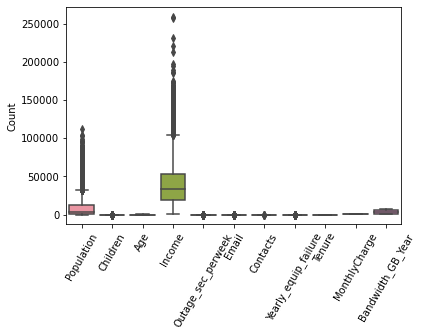

In [38]:
#Dropping categorical variables 
churn_continuous_data = churn_model_data.drop(['Area','Marital','Gender','Churn', 'Techie','Contract', 'Port_modem', 
                                          'Tablet', 'InternetService', 'Phone', 'Multiple','OnlineSecurity', 'OnlineBackup',
                                          'DeviceProtection','TechSupport','TechSupport', 'StreamingTV', 'StreamingMovies',
                                          'PaperlessBilling','PaymentMethod','Item1','Item2','Item3','Item4','Item5','Item6',
                                          'Item7','Item8','State'], axis=1)

data_melted=pd.melt(churn_continuous_data)

data_melted=pd.melt(churn_continuous_data)
fig=sns.boxplot(x="variable", 
                y="value", 
                data=data_melted)
plt.ylabel('Count')
plt.xlabel('')
fig.set_xticklabels(fig.get_xticklabels(),rotation=60)
plt.rcParams["figure.figsize"] = (14,6)
plt.show()

## C1: Data Preprocessing Goal
One goal of data preprocessing is to scale the data. As shown in the figure above, the continuous variables in the data set each have different sizes and magnitudes. The "Population" and "Income" variables have a much greater magnitude than the rest of the continuous variables in the dataset. Leaving the variables unscaled will give the variables with a larger magnitude a greater effect on the classification model, which could lead to an inaccurate model. To scale data, the StandardScaler method in scikit-learn can be used. Scaling the data using this method will ensure each variable has a mean of zero with a variance of one, bringing all features to the same magnitude. (Giussani, 2020)

## C2: Initial Data Set Variables

<b>Independent Variables</b>
- Population              (Continuous)

- Area                    (Categorical)

- Children                (Continuous)

- Age                     (Continuous)

- Income                  (Continuous)

- Marital                 (Categorical)

- Gender                  (Categorical)

- State                   (Categorical)

- Outage_sec_perweek      (Continuous)

- Email                   (Continuous)

- Contacts                (Continuous)

- Yearly_equip_failure    (Continuous)

- Techie                  (Categorical)

- Tenure                  (Continuous)

- Contract                (Categorical)

- Port_modem              (Categorical)

- Tablet                  (Categorical)

- InternetService         (Categorical)

- Phone                   (Categorical)

- Multiple                (Categorical)

- OnlineSecurity          (Categorical)

- OnlineBackup            (Categorical)

- DeviceProtection        (Categorical)

- TechSupport             (Categorical)

- StreamingTV             (Categorical)

- StreamingMovies         (Categorical)

- PaperlessBilling        (Categorical)

- PaymentMethod           (Categorical)

- Tenure                  (Categorical)

- MonthlyCharge           (Continuous)

- Bandwidth_GB_Year       (Continuous)

- Item1                   (Categorical)

- Item2                   (Categorical)

- Item3                   (Categorical)

- Item4                   (Categorical)

- Item5                   (Categorical)

- Item6                   (Categorical)

- Item7                   (Categorical)

- Item8                   (Categorical)

<b>Classification Variable</b>

- Churn                   (Categorical)

## C3: Data Preparation Steps

### Step 1: Import Data
The first step is to upload the data set into the data analysis program to be used. In this case, the data set "churn_clean" has already been imported as shown above. While our data set was already in .csv format, it may be necessary to transform the data set depending on the format and program being used. 


### Step 2: Initial Data Exploration
The second step of data preparation is to conduct initial data exploration. During this step, the information of the data set and each variable is explored for data types, dataset size, number of variables, null values, odd data, etc. By conducting an initial exploration of the data set, specific variables can be examined for usefulness. For example, the first four columns can be dropped from our initial dataset as they are administrative features used to identify customers. 

Additionally, visual data analysis is conducted to get an understanding of patterns and relationships within the dataset. Having an understanding of how the data is distributed and how the variables are related can help when creating the model. For example, comparing the categorical variable of "Churn" with other continuous variables gives us an idea of how features are distributed within each category. Other variables that have been identified to be dropped are 'City', 'County', 'Lat', 'Lng',
'TimeZone','Job', and 'Zip'. These variables are not very useful or contain too many unique values to be useful in a KNN model. For example, the 'Job' variable doesn't seem to be standardized and many different unique values are imputed. By leaving these variables and dummy coding them as required by the specific model being created would create thousands of features, way too many to create a useful KNN model with.   

In [39]:
# Retriving basic information of the data set
churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [40]:
#Drop unused variables
churn_dropped_data = churn_clean.drop(['CaseOrder','Customer_id','Interaction','UID','City','County','Lat','Lng',
                  'TimeZone','Job','Zip'], axis=1)

In [41]:
#Checking data values in numerical variables
churn_dropped_data.describe().round(2)

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,9756.56,2.09,53.08,39806.93,10.00,12.02,0.99,0.40,34.53,172.62,3392.34,3.49,3.51,3.49,3.50,3.49,3.50,3.51,3.50
std,14432.70,2.15,20.70,28199.92,2.98,3.03,0.99,0.64,26.44,42.94,2185.29,1.04,1.03,1.03,1.03,1.02,1.03,1.03,1.03
min,0.00,0.00,18.00,348.67,0.10,1.00,0.00,0.00,1.00,79.98,155.51,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,738.00,0.00,35.00,19224.72,8.02,10.00,0.00,0.00,7.92,139.98,1236.47,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,2910.50,1.00,53.00,33170.60,10.02,12.00,1.00,0.00,35.43,167.48,3279.54,3.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00
75%,13168.00,3.00,71.00,53246.17,11.97,14.00,2.00,1.00,61.48,200.73,5586.14,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,111850.00,10.00,89.00,258900.70,21.21,23.00,7.00,6.00,72.00,290.16,7158.98,7.00,7.00,8.00,7.00,7.00,8.00,7.00,8.00


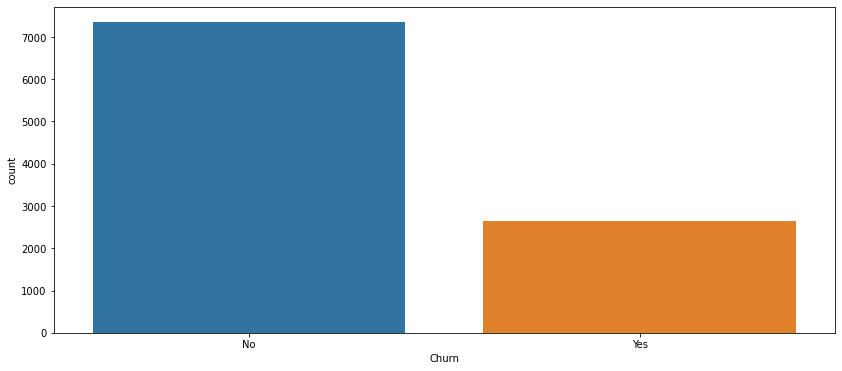

In [42]:
#counts of churn
sns.countplot(x="Churn",
            data = churn_clean)

plt.show()

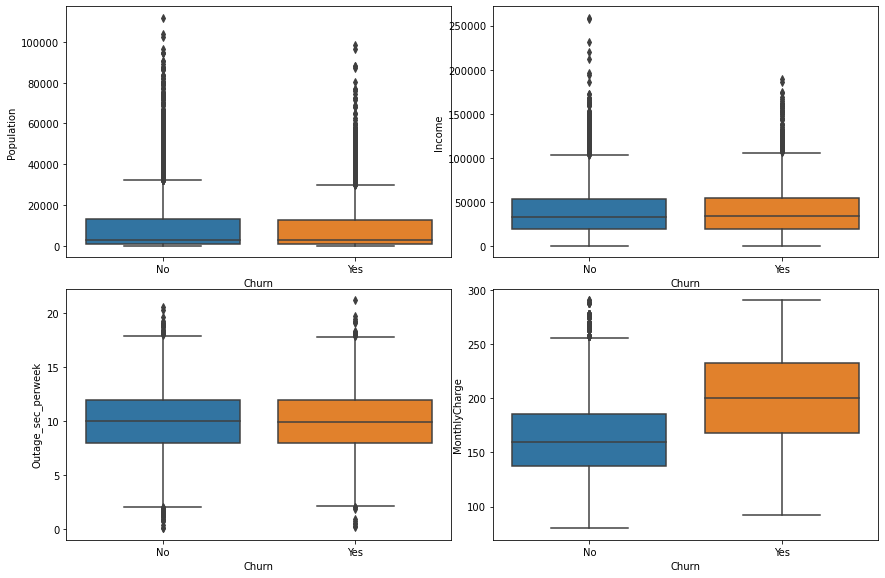

In [43]:
#Creating boxplots 
fig, axs = plt.subplots(2,2, figsize=(12,8))
plt.tight_layout()

sns.boxplot(x="Churn",
            y="Population",
            data = churn_clean,
            ax = axs[0,0])
sns.boxplot(x="Churn",
            y="Income",
            data = churn_clean,
            ax = axs[0,1])

sns.boxplot(x="Churn",
            y="Outage_sec_perweek",
            data = churn_clean,
            ax = axs[1,0])

sns.boxplot(x="Churn",
            y="MonthlyCharge",
            data = churn_clean,
            ax = axs[1,1]);

### Step 3: Evaluate Dataset for Missing Data
In this step of data preprocessing, the variables in the data set are examined for missing data. Missing data is usually identified as "NULL" values but could also be respresented by different values such as "0" or "?" as other examples. As shown below, there are 97 rows in our dataset with population values of "0". There are multiple ways that the missing data could be imputed. One method would be to impute the mean value of population in the observations with missing values. Another more time consuming option would be to manually impute the actual population values based off recent census data. The method of missing data imputation varies based on the significance of the variable and the accuracy needed based effects of data imputation. In this case, the quickest and most effective method would be to drop the observations from the data set altogether. Since we have 10000 observation within our dataset, losing 97 would not significantly impact our model results. 

In [44]:
display(churn_dropped_data.isnull().any())

State                   False
Population              False
Area                    False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
TechSupport             False
StreamingTV             False
StreamingMovies         False
PaperlessBilling        False
PaymentMethod           False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
Item1                   False
Item2                   False
Item3     

In [45]:
pop_zero = churn_dropped_data[churn_dropped_data['Population'] == 0]
pop_zero

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
13,ME,0,Urban,5,29,115114.57,Separated,Female,No,5.880566,...,184.971516,1948.694497,5,6,5,2,4,5,4,4
422,MI,0,Urban,2,51,14817.22,Married,Female,Yes,11.187327,...,200.132293,1537.296207,4,5,5,3,4,4,4,2
428,NY,0,Suburban,8,25,43586.80,Never Married,Female,No,6.697226,...,152.479779,2192.693797,3,3,3,4,4,6,4,3
434,TN,0,Urban,1,23,48852.54,Divorced,Male,Yes,4.924369,...,192.470522,801.470960,4,4,4,3,3,5,4,4
446,NC,0,Urban,1,56,65900.37,Widowed,Female,Yes,9.086330,...,240.114868,1886.312286,4,4,4,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,TN,0,Suburban,1,63,85694.68,Separated,Female,No,11.901770,...,162.497000,5088.812303,4,4,2,5,4,3,4,3
9441,NY,0,Suburban,1,60,25429.84,Widowed,Female,No,11.733060,...,162.511900,5341.089808,4,4,3,4,2,4,3,4
9657,MN,0,Rural,0,35,71970.60,Divorced,Female,No,8.500510,...,197.470200,6064.836260,4,5,4,3,4,4,3,2
9702,GA,0,Suburban,0,34,36171.94,Divorced,Female,No,10.095540,...,137.468400,5914.162068,3,3,2,5,2,3,3,4


In [46]:
#Drop observations with condition of population equaling 0
churn_dropped_data.drop(churn_dropped_data[churn_dropped_data['Population'] == 0].index, inplace = True)

In [47]:
churn_dropped_data

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,AK,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,MI,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,OR,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,CA,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,TX,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VT,640,Rural,3,23,55723.74,Married,Male,No,9.415935,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,TN,77168,Rural,4,48,34129.34,Divorced,Male,No,6.740547,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,TX,406,Rural,1,48,45983.43,Never Married,Female,No,6.590911,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,GA,35575,Urban,1,39,16667.58,Separated,Male,No,12.071910,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


### Step 4: Factoring Numberical Variables and Encoding Categorical Variables


In [48]:
#Converting Item variables to categorical variables
churn_dropped_data[['Item1','Item2','Item3',
                  'Item4','Item5','Item6',
                  'Item7','Item8']] = churn_dropped_data[['Item1','Item2','Item3',
                                                        'Item4','Item5','Item6',
                                                        'Item7','Item8']].astype('category')

In [49]:
#Transform categorical variables to numeric using dummy variables and dropping one column to meet n-1 
churn_KNN_data = pd.get_dummies(churn_dropped_data, columns = ["Contract", "State","Area","Marital","Gender","Techie",
                                "Port_modem","Tablet","InternetService","Phone","Multiple","OnlineSecurity",
                                "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                                "PaperlessBilling","PaymentMethod",'Item1','Item2','Item3','Item4','Item5',
                                'Item6','Item7','Item8'],  drop_first=True)

In [50]:
list(churn_KNN_data)

['Population',
 'Children',
 'Age',
 'Income',
 'Churn',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Contract_One year',
 'Contract_Two Year',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_PR',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'Area_Suburban',
 'Area_Urban',
 'Marital_Married',
 'Marital_Never Married',
 'Marital_Separated',
 'Marital_Wid

## C4: Copy of Prepared Dataset

In [51]:
churn_KNN_data.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_1/churn_KNN_data.csv')

# Part IV: Analysis
The KNN analysis technique is explained through the process below. The analysis meets the requirements of splitting the data into training and test data and is saved as .csv files. The first step of the analysis is to separate the classification variable from the matrix dataset.

In [52]:
#Create X and y matrix for splitting and modeling
X = churn_KNN_data.drop(['Churn'], axis =1)
y = churn_KNN_data['Churn']

Next, pipeline steps are created that implement both the StandardScaler function and the KNeighborsClassifier function. For the initial model, the "n_neighbors" parameter is not specified. 

In [53]:
#Create pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

The data sets are then split into the training and testing sets. It is specified that 20% of the data set is to be used for testing purposes using the "test_size" parameter.

In [54]:
#split the data set into train(80%) and test(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Data splits are saved to .csv files
X_train.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_1/X_train.csv')
X_test.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_1/X_test.csv')
y_train.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_1/y_train.csv')
y_test.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_1/y_test.csv')

The training set is then fit into a KKN model using the pipeline built above which scales and fits the data. After fitting the model the test set is then used to fit the unlabeled data and use KNN to predict what each data point is labeled as.

In [56]:
#Train the initial model on the train set and predict outcomes with test set
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [57]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

The accuracy score and classification report is calculated using the accuracy_score and classification_report functions. The initial model used k=5 to predict.

In [58]:
#Calculate accuracy score for initial model
accuracy_score(y_test, y_pred)

0.7279151943462897

In [59]:
#Caluculate precision, recall, and f1 score for initial model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.76      0.91      0.83      1424
         Yes       0.53      0.26      0.35       557

    accuracy                           0.73      1981
   macro avg       0.65      0.59      0.59      1981
weighted avg       0.70      0.73      0.69      1981



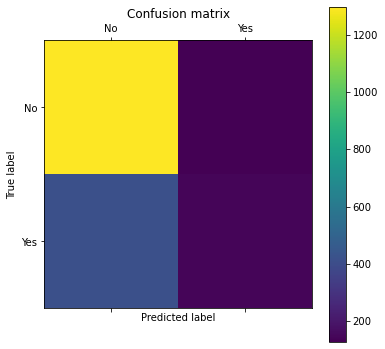

In [60]:
#Create confusion matrix for initial model
plt.matshow(confusion_matrix(y_test, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1],["No","Yes"])
plt.yticks([0,1],["No","Yes"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Next, another model was created and the second set of predictions were made using the same pipeline but this time ran using cross-validation. The model that was created using cross-validation gave a best k parameter of nine and the accuracy was slightly increased.

In [62]:
#Conduct cross validation modeling and hypertuning for best K value
parameters = {'knn__n_neighbors': np.arange(1,50)}
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred2 = cv.predict(X_test)

In [64]:
#print giving best K value
print(cv.best_params_)

{'knn__n_neighbors': 11}


In [65]:
#Calculate accuracy for tuned model
print(cv.score(X_test, y_test))

0.7455830388692579


In [66]:
#Calculate precision, recall, and f1 score for tuned model
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          No       0.75      0.97      0.85      1424
         Yes       0.68      0.18      0.29       557

    accuracy                           0.75      1981
   macro avg       0.71      0.57      0.57      1981
weighted avg       0.73      0.75      0.69      1981



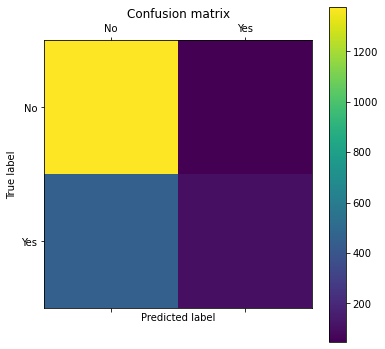

In [67]:
#Create confusion matrix for second model
plt.matshow(confusion_matrix(y_test, y_pred2))
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1],["No","Yes"])
plt.yticks([0,1],["No","Yes"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
#Calculate probability scores
y_scores = pipeline.predict_proba(X_test)

In [69]:
#create roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1],
                                 pos_label='Yes')
roc_df = pd.DataFrame({'sensitivity': tpr, 'specificity': 1 - fpr})

In [70]:
#calculate AUC
roc_auc_score(y_test, y_scores[:, 1])

0.6944190890202329

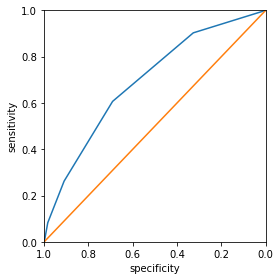

In [71]:
#create ROC graphic
ax = roc_df.plot(x='specificity', y='sensitivity', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('sensitivity')


plt.tight_layout()
plt.show()

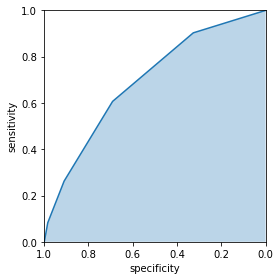

In [72]:
#create AUC graphic
ax = roc_df.plot(x='specificity', y='sensitivity', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('sensitivity')
ax.fill_between(roc_df.specificity, 0, roc_df.sensitivity, alpha=0.3)


plt.tight_layout()
plt.show()

# Part V: Data Summary and Implications
As the analysis portion shows, two separate KNN models were created: one without using cross-validation on the training data and one using cross-validation. By comparing the accuracies, it can be determined that the model using cross-validation was slightly more accurate at 74.5%. However, this means that the model was only able to predict the correct results of the test set 74.5% of the time. Continuing the evaluation, the model was much better at predicting the classification of customers who didn't churn vs those that did. This was determined by looking at the precision and F-score of the "Yes" classification having a precision of 68% and a low F-score of .29. The low precision can be validated by looking at the confusion matrix. The number of "True Yes" classifications that were predicted to be "No" had higher counts than the number of "True Yes" that were predicted to be "Yes".

Looking at the area under the curve(AUC) results show that the model can predict the classification better than chance (50/50). However, the chance of predicting a correct classification is only 69% with an AUC score of .69. With these results, we can assess that the model

## Limitations
Overall, the resulting scores of this model can predict the customers' classification of whether they churn or not just under 3/4th of the time. This may mean the model that was created may not be accurate enough for the organization's needs. However, without having any other models to compare it to, it is difficult to determine the usefulness of the model outright.
 

## Course of Action
The model could be useful in predicting customer churn but in a limited manner. It may be useful to analyze the effects of each variable on the model to get an idea of how each feature affects the customers' decision to churn. However, due to a large number of features in the dataset, there are likely better models available that can be used to predict and gain insight into the organization's question. The suggested course of action is to create other models using different methods and compare them to the current KNN model. 

# Part VI: Demonstration

## F. Video

## G. Code Sources

Bowne-Anderson, H. (n.d.). Supervised Learning with scikit-learn. Retrieved August 15, 2021, from https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn

Bruce, P., Bruce, A. G., & Gedeck, P. (2020). Practical statistics for data scientists: 50 essential concepts using R and Python. Sebastopol: OReilly.

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Python Software Foundation. Python Language Reference, version 3.7. Available at http://www.python.org

W. McKinney, AQR Capital Management, pandas: a python data analysis library, http://pandas.sourceforge.net

## H. References

Andrea Giussani. (2020). Applied Machine Learning with Python. EGEA Spa - Bocconi University Press.
